<a href="https://colab.research.google.com/github/Tung003/CNN_pytorch_cuda/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install torchvision
!pip install pandas
!pip install numpy
!pip install pillow
!pip install opencv-python
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 894.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

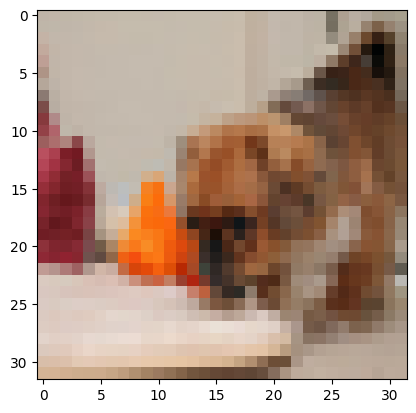

torch.Size([32, 32, 3])


In [14]:
import torch
from torch import nn
from torchvision import transforms,datasets
from PIL import Image
import os
from torch.utils.data import Dataset,DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))])

train_dataset=datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/celeba/data',
                               train=True,download=False,transform=transform)
test_dataset=datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/celeba/data',
                              train=False,download=False,transform=transform)

train_data_loader=DataLoader(dataset=train_dataset,
                             batch_size=64,shuffle=True)
test_data_loader=DataLoader(dataset=test_dataset,
                            batch_size=64,shuffle=True)
img,label=next(iter(train_data_loader))
image = img[0].permute(1,2,0) * 0.5 + 0.5
plt.imshow(image)
plt.show()
print(image.shape)

Epoch: 1; Loss: 1.9688
Epoch: 2; Loss: 1.6806
Epoch: 3; Loss: 1.4142
Epoch: 4; Loss: 1.1328
Epoch: 5; Loss: 0.9420
Epoch: 6; Loss: 0.8152
Epoch: 7; Loss: 0.7095
Epoch: 8; Loss: 0.6215
Epoch: 9; Loss: 0.5452
Epoch: 10; Loss: 0.4797
độ chính xác trên bộ test:  82.18


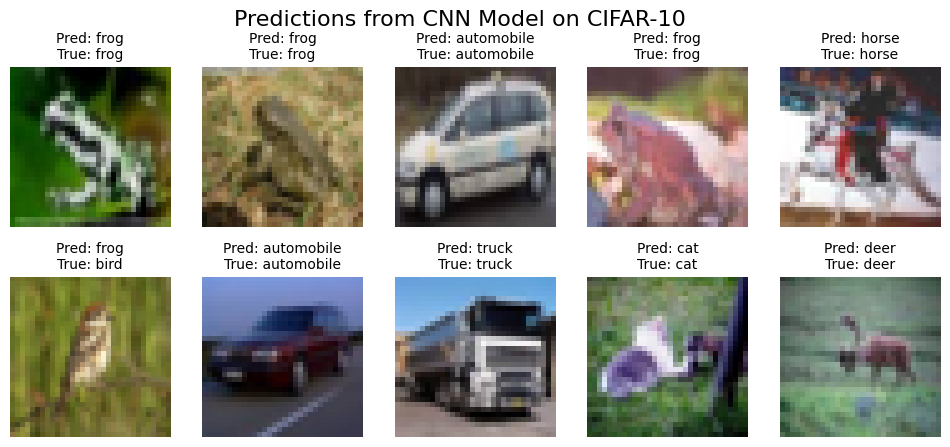

In [38]:
import torch
from torch import nn,optim
from torchvision import transforms,datasets
from PIL import Image
import os
from torch.utils.data import Dataset,DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))])

train_dataset=datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/celeba/data',
                               train=True,download=False,transform=transform)
test_dataset=datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/celeba/data',
                              train=False,download=False,transform=transform)

train_data_loader=DataLoader(dataset=train_dataset,
                             batch_size=32,shuffle=True)
test_data_loader=DataLoader(dataset=test_dataset,
                            batch_size=32,shuffle=True)

class CNN_CIFAR10(nn.Module):
  def __init__(self):
    super().__init__()
    self.SEQ=nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=1),# out_size=3,64,32,32
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),# out_size=3,64,32,32
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2,padding=0),# out_size=3,64,16,16

        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),# out_size=3,128,16,16
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1),# out_size=3,128,16,16
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2,padding=0),# out_size=3,128,8,8

        nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),# out_size=3,256,8,8
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),# out_size=3,256,8,8
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),# out_size=3,256,8,8
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2,padding=0),# out_size=3,256,4,4

        nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),# out_size=3,512,4,4
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),# out_size=3,512,4,4
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),# out_size=3,512,4,4
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2,padding=0),# out_size=3,512,2,2

        nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),# out_size=3,512,2,2
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),# out_size=3,512,2,2
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),# out_size=3,512,2,2
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2,padding=0),# out_size=3,512,1,1
    )
    self.flaten=nn.Flatten()# out_size=512x1x1
    self.fc=nn.Sequential(
        nn.Linear(in_features=512,out_features=4096),
        nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(in_features=4096,out_features=2048),
        nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(in_features=2048,out_features=10))
  def forward(self,x):
    x=self.SEQ(x)
    x=self.flaten(x)
    x=self.fc(x)
    return x

if __name__=="__main__":
  device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model=CNN_CIFAR10().to(device)
  num_epochs=10
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.Adam(model.parameters(),lr=0.001)
  total_step=len(train_data_loader)

  for epoch in range(num_epochs):
    model.train()
    loss_total=0
    for images,labels in train_data_loader:
      images=images.to(device)
      labels=labels.to(device)
      outputs=model(images)
      loss=criterion(outputs,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_total+=loss.item()

    print(f"Epoch: {epoch+1}; Loss: {loss_total/total_step:.4f}")
  torch.save(model.state_dict(),"/content/drive/MyDrive/Colab Notebooks/celeba/CNN_CIFAR10_10epochs.pth")
  model.eval()

  correct=0
  total=0
  with torch.no_grad():
      for image,label in test_data_loader:
          image,label=image.to(device),label.to(device)
          outputs=model(image)
          _,predicted=torch.max(outputs,1)
          total+=label.size(0)
          correct+=(predicted==label).sum().item()
  accuracy=100*correct/total
  print("độ chính xác trên bộ test: ",accuracy)


  model.eval()
  dataiter = iter(test_data_loader)
  images, labels = next(dataiter)
  images, labels = images[:10].to(device), labels[:10].to(device)
  with torch.no_grad():
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)


  images = images.cpu().numpy()
  images = images * 0.5 + 0.5
  images = np.transpose(images, (0, 2, 3, 1))


  classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck']

  # Hiển thị 10 ảnh cùng với nhãn dự đoán
  fig, axes = plt.subplots(2, 5, figsize=(12, 5))
  fig.suptitle("Predictions from CNN Model on CIFAR-10", fontsize=16)

  for i, ax in enumerate(axes.flat):
      ax.imshow(images[i])
      ax.set_title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}", fontsize=10)
      ax.axis('off')

  plt.show()
